In [1]:
# important necessary libraries 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating path for dataset
current_dir = os.getcwd()
dataset_file = '/home/ubuntu/Downloads/usa_real_estate.csv'


In [3]:
dataset_path = os.path.join(current_dir, dataset_file)

In [4]:
data = pd.read_csv(dataset_path)
data.head()

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,41,63639.0,for_sale,3900000.0,6.0,6.0,0.94,269007.0,Penuelas,Puerto Rico,624.0,9297.0,NaN
1,56,55906.0,for_sale,10000000.0,6.0,5.0,0.12,1233063.0,Aguada,Puerto Rico,602.0,6000.0,NaN
2,66,66561.0,for_sale,3250000.0,NaN,6.0,0.06,1856959.0,Rincon,Puerto Rico,602.0,NaN,NaN
3,69,46019.0,for_sale,1399000.0,5.0,3.0,8.74,6714.0,Aguada,Puerto Rico,602.0,5517.0,NaN
4,124,92147.0,for_sale,8000000.0,NaN,NaN,247.57,6475.0,Isabela,Puerto Rico,603.0,NaN,NaN


### Top 5 rows in the dataset
- Where
  - status: Status of the house i.e sold or not sold
  - price: Price of the house.
  - bed: How many bed are there inside house.
  - bath: How many toilets are there inside house.
  - city: In which city, house lies.
  - street: Address of the house
  - zip_code: zip code of address
  - prev_sold_date: date of the house that are previously sold.
  - acre_lot: square meter of the house.
  - brokered_by: arrange by the broker to sell the house
  
  


In [5]:
# Shape of the data
data.shape

print(f'Rows: {data.shape[0]} and column: {data.shape[1]}')

Rows: 175154 and column: 13


Our dataset has 175154 rows and 13 columns

In [8]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175154 entries, 0 to 175153
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      175154 non-null  int64  
 1   brokered_by     174790 non-null  float64
 2   status          175154 non-null  object 
 3   price           173613 non-null  float64
 4   bed             141506 non-null  float64
 5   bath            139619 non-null  float64
 6   acre_lot        148289 non-null  float64
 7   street          173621 non-null  float64
 8   city            175009 non-null  object 
 9   state           175154 non-null  object 
 10  zip_code        175105 non-null  float64
 11  house_size      134799 non-null  float64
 12  prev_sold_date  115466 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 17.4+ MB


In [9]:
data['city'].value_counts().head()

city
New York City    6391
Los Angeles      4161
New York         2975
San Francisco    2814
San Jose         2441
Name: count, dtype: int64

## let's see weather a column contains null values or not

In [10]:
data.isnull().sum()

Unnamed: 0            0
brokered_by         364
status                0
price              1541
bed               33648
bath              35535
acre_lot          26865
street             1533
city                145
state                 0
zip_code             49
house_size        40355
prev_sold_date    59688
dtype: int64

### it seems like we have lot of work to do.
- Except for status, price, state, zip_code and prev_sold_date every other column atleast contains a null values

Let's visualize the null values 

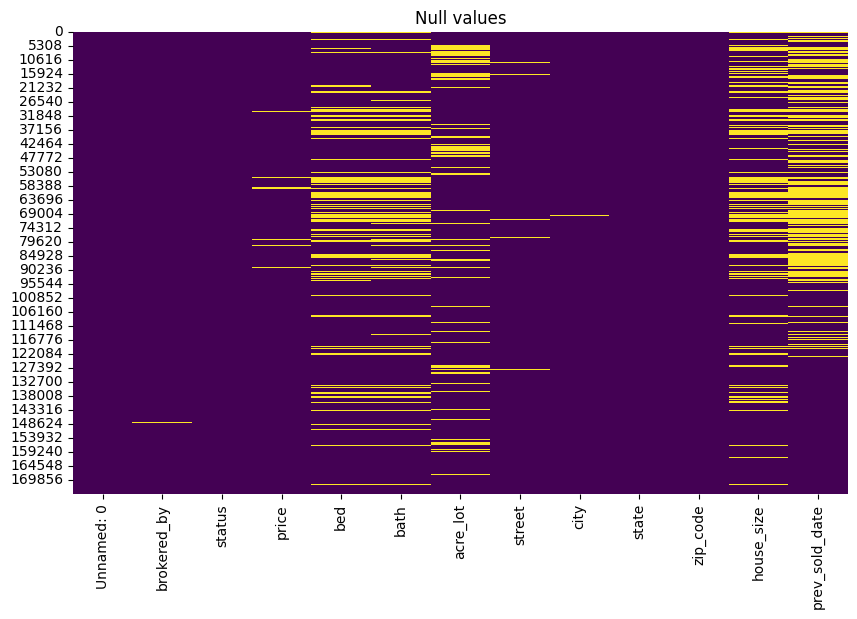

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap='viridis', cbar=False)
plt.title('Null values')
plt.show()

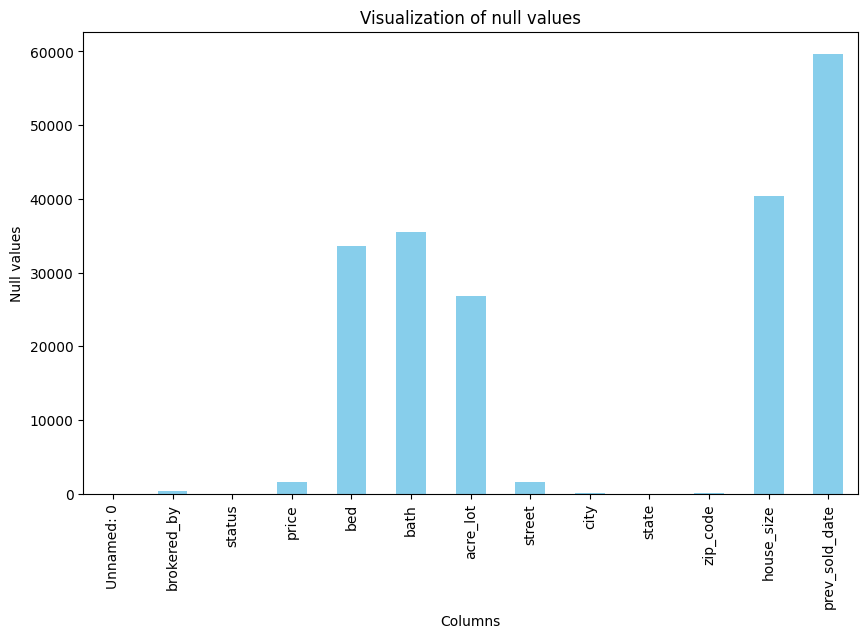

In [12]:
plt.figure(figsize=(10, 6))
data.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Visualization of null values')
plt.xlabel('Columns')
plt.ylabel('Null values')
plt.show()

As we can see there is highest null_values in prev_sold_date.

We need to fill all theses values in proper way to perform our model better

Let's fill the missing columns with median.

In [13]:
cols_to_fill = ['brokered_by', 'street', 'house_size', 'bed','acre_lot', 'bath', 'zip_code']


In [14]:
data[cols_to_fill] = data[cols_to_fill].fillna(data[cols_to_fill].median())

In [15]:
data.isnull().sum()

Unnamed: 0            0
brokered_by           0
status                0
price              1541
bed                   0
bath                  0
acre_lot              0
street                0
city                145
state                 0
zip_code              0
house_size            0
prev_sold_date    59688
dtype: int64

In [16]:
data.tail()

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
175149,2226238,54821.0,sold,1650000.0,4.0,4.0,1650.72,1926311.0,Asotin,Washington,99401.0,3067.0,2022-01-06
175150,2226268,67372.0,sold,7.0,4.0,4.0,48.00,1933610.0,Richland,Washington,99362.0,3067.0,2021-11-12
175151,2226271,105917.0,sold,1349000.0,4.0,4.0,0.94,838633.0,Walla Walla,Washington,99362.0,3014.0,2021-11-08
175152,2226307,105917.0,sold,1250000.0,3.0,3.0,1.00,234882.0,Walla Walla,Washington,99362.0,2340.0,2021-12-27
175153,2226315,108356.0,sold,1225000.0,5.0,4.0,1.02,866177.0,Walla Walla,Washington,99362.0,2653.0,2022-01-24


### last 5 rows of the dataset

Let's drop the datasets that contains large missing values 

In [17]:
data.dropna(inplace=True)


In [18]:
data.isnull().sum()

Unnamed: 0        0
brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

Lets work on prev_sold_date

In [20]:
data[['prev_sold_year', 'prev_sold_month', 'prev_sold_day']] = data['prev_sold_date'].str.split('-', expand=True)

In [21]:
# Since we have previous sold date day and year in seperate column, we don't need prev_sold_date column
data.drop('prev_sold_date', axis=1, inplace=True)


In [22]:
# There is Unnamed: 0 col, lets dorp it too

data.drop('Unnamed: 0', axis=1, inplace=True)


In [23]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_year,prev_sold_month,prev_sold_day
208,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018,04,05
394,18211.0,for_sale,1225000.0,6.0,5.0,0.41,1970515.0,San Juan,Puerto Rico,926.0,4210.0,2022,03,18
435,23174.0,for_sale,2650000.0,4.0,4.0,0.99,9855.0,Easthampton,Massachusetts,1027.0,3067.0,2005,07,13
436,23722.0,for_sale,1295000.0,4.0,5.0,7.81,794865.0,Hadley,Massachusetts,1035.0,7000.0,1997,08,06
438,107912.0,for_sale,1390000.0,3.0,5.0,14.48,1685783.0,Williamsburg,Massachusetts,1038.0,3112.0,2004,04,29


In [24]:
# Lets see the types of our dataframe
data.dtypes

brokered_by        float64
status              object
price              float64
bed                float64
bath               float64
acre_lot           float64
street             float64
city                object
state               object
zip_code           float64
house_size         float64
prev_sold_year      object
prev_sold_month     object
prev_sold_day       object
dtype: object

In [25]:
# function to convert object and float into int datatype except acre_lot

def to_int(df, col):
    df[col] = df[col].astype(int)
    return df

In [26]:
to_int(data, 'brokered_by')
to_int(data, 'price')
to_int(data, 'bed')
to_int(data, 'bath')
to_int(data, 'zip_code')
to_int(data, 'house_size')
to_int(data, 'prev_sold_day')
to_int(data, 'prev_sold_month')
to_int(data, 'prev_sold_year')
# to_int(data, 'acre_lot')
to_int(data, 'street').head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_year,prev_sold_month,prev_sold_day
208,103341,for_sale,6899000,4,6,0.83,17467,Saint Thomas,Virgin Islands,802,4600,2018,4,5
394,18211,for_sale,1225000,6,5,0.41,1970515,San Juan,Puerto Rico,926,4210,2022,3,18
435,23174,for_sale,2650000,4,4,0.99,9855,Easthampton,Massachusetts,1027,3067,2005,7,13
436,23722,for_sale,1295000,4,5,7.81,794865,Hadley,Massachusetts,1035,7000,1997,8,6
438,107912,for_sale,1390000,3,5,14.48,1685783,Williamsburg,Massachusetts,1038,3112,2004,4,29


In [27]:
data.dtypes

brokered_by          int64
status              object
price                int64
bed                  int64
bath                 int64
acre_lot           float64
street               int64
city                object
state               object
zip_code             int64
house_size           int64
prev_sold_year       int64
prev_sold_month      int64
prev_sold_day        int64
dtype: object

<Axes: xlabel='status'>

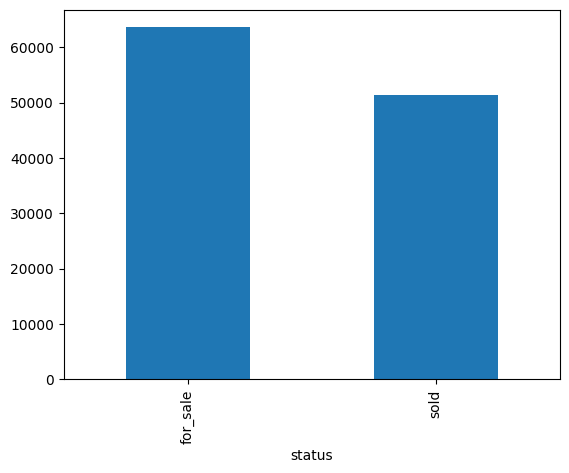

In [28]:
data['status'].value_counts().plot(kind='bar')

In [29]:
data['status'].value_counts()

status
for_sale    63590
sold        51362
Name: count, dtype: int64

In [30]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

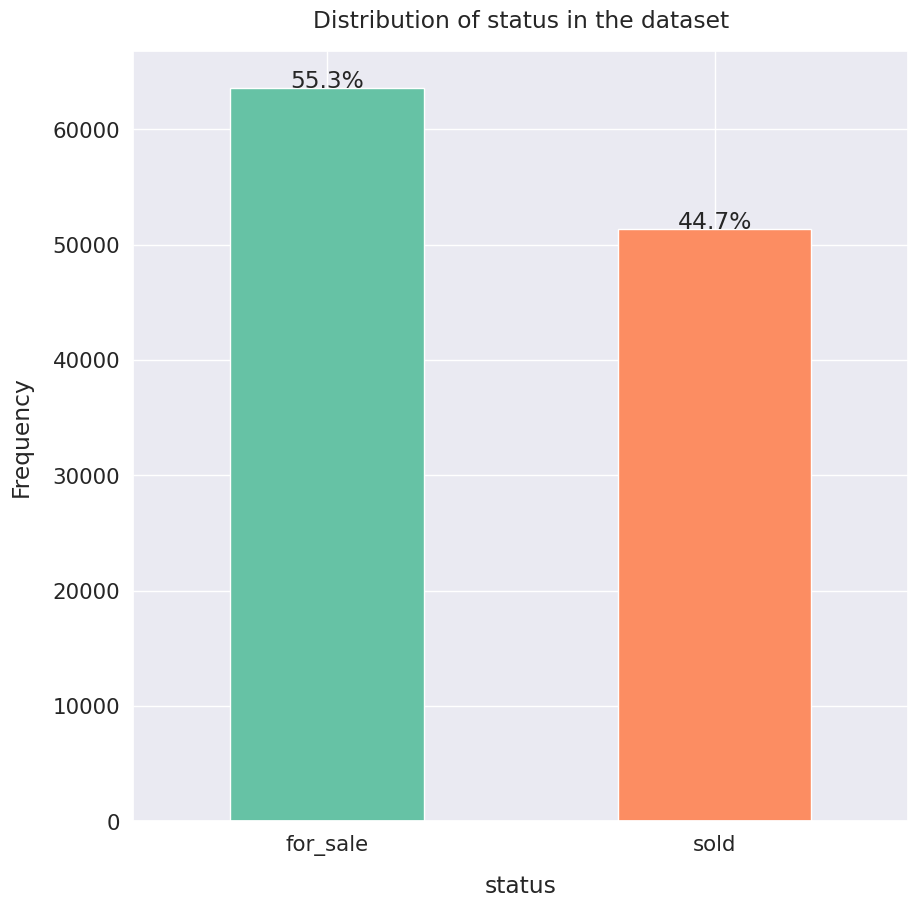

In [31]:
univariate_barplot(data, 'status')

It looks like we have higher number of house to be sold than the houses that are already sold.

In [34]:
def scatter_plot(data, x, y, label="price"):
    data.sort_values(label).plot.scatter(
        x=x,
        y=y,
        c=label,
        colormap=sns.color_palette("flare", as_cmap=True),
        figsize=(10, 10),
    )

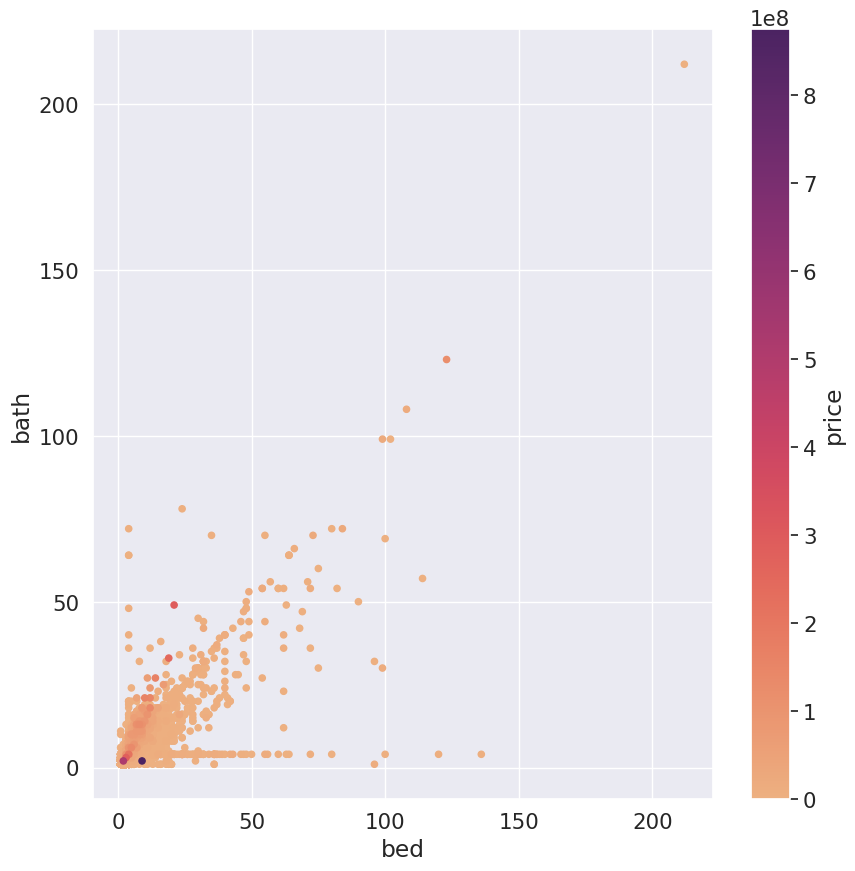

In [35]:
scatter_plot(data = data, x='bed', y='bath')

As there is low number of bed and bath, the price of the house is cheap.

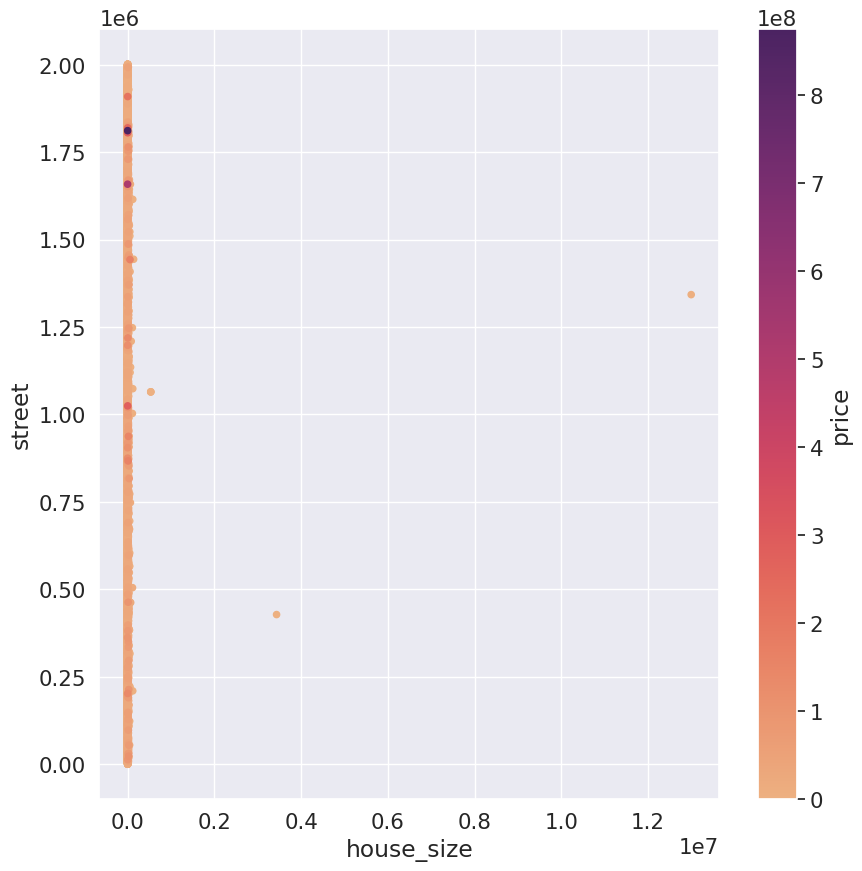

In [37]:
scatter_plot(data=data, x='house_size', y='street')

### Fetch the object column

lets work on categorical features and numerical features



In [38]:
categorical_column = [col for col in data.columns if data[col].dtype == 'O']
categorical_column

['status', 'city', 'state']

In [39]:
numerical_column = [col for col in data.columns if data[col].dtype != 'O']
numerical_column

['brokered_by',
 'price',
 'bed',
 'bath',
 'acre_lot',
 'street',
 'zip_code',
 'house_size',
 'prev_sold_year',
 'prev_sold_month',
 'prev_sold_day']

In [40]:
categorical_features = data[categorical_column]
categorical_features.head()

,status,city,state
208,for_sale,Saint Thomas,Virgin Islands
394,for_sale,San Juan,Puerto Rico
435,for_sale,Easthampton,Massachusetts
436,for_sale,Hadley,Massachusetts
438,for_sale,Williamsburg,Massachusetts


In [41]:
numerical_features = data[numerical_column]
numerical_features.head()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,prev_sold_year,prev_sold_month,prev_sold_day
208,103341,6899000,4,6,0.83,17467,802,4600,2018,4,5
394,18211,1225000,6,5,0.41,1970515,926,4210,2022,3,18
435,23174,2650000,4,4,0.99,9855,1027,3067,2005,7,13
436,23722,1295000,4,5,7.81,794865,1035,7000,1997,8,6
438,107912,1390000,3,5,14.48,1685783,1038,3112,2004,4,29


In [42]:
categorical_features['status'].value_counts()

status
for_sale    63590
sold        51362
Name: count, dtype: int64

In [43]:
categorical_features['city'].value_counts()

city
New York City    3809
Los Angeles      3673
San Francisco    2470
San Jose         2327
San Diego        1658
                 ... 
Kila                1
Polebridge          1
Des Plaines         1
Schaumburg          1
Asotin              1
Name: count, Length: 5957, dtype: int64

In [44]:
categorical_features['state'].value_counts()

state
California              43433
Florida                 14386
New York                10562
Washington               4968
Texas                    4890
Massachusetts            3201
Arizona                  3024
Virginia                 2597
New Jersey               2578
Colorado                 2237
Illinois                 1897
Georgia                  1739
North Carolina           1513
Maryland                 1464
Oregon                   1314
South Carolina           1251
Hawaii                   1196
Pennsylvania             1146
District of Columbia     1045
Tennessee                 972
Connecticut               948
Arkansas                  841
Nevada                    814
Utah                      810
Minnesota                 720
Idaho                     617
Ohio                      525
Michigan                  468
Oklahoma                  410
Wisconsin                 404
Montana                   399
Missouri                  398
Alabama                   362
New 

### Onehot encoding in city column

In [45]:
# city = pd.get_dummies(categorical_features['city'], drop_first=True)
# city_binary = (city == 1).astype(int)
# city_binary.head()

### Onehot encoding in status column


In [48]:
status = pd.get_dummies(categorical_features['status'], drop_first=True).astype(int)
# status_binary = (status == 1).astype(int)
status.head()

,sold
208,0
394,0
435,0
436,0
438,0


In [49]:
# Lets see how many catgories are there in categories column

for i in categorical_features.columns:
    print(f'{i} has total {len(categorical_features[i].value_counts())} categories')

status has total 2 categories
city has total 5957 categories
state has total 54 categories


**[Term] Label Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
categorical_features['status'].unique()

array(['for_sale', 'sold'], dtype=object)

In [53]:
categorical_features['status'].value_counts()

status
for_sale    63590
sold        51362
Name: count, dtype: int64

In [54]:
dict_stat = {'sold': 0,
             'for_sale': 1}

In [56]:
categorical_features['status'] = categorical_features['status'].map(dict_stat)

/tmp/ipykernel_13258/1853492870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features['status'] = categorical_features['status'].map(dict_stat)


In [57]:
categorical_features.head()

,status,city,state
208,NaN,Saint Thomas,Virgin Islands
394,NaN,San Juan,Puerto Rico
435,NaN,Easthampton,Massachusetts
436,NaN,Hadley,Massachusetts
438,NaN,Williamsburg,Massachusetts


In [58]:
data = pd.concat([status, numerical_features], axis = 1)
data.head()

,sold,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,prev_sold_year,prev_sold_month,prev_sold_day
208,0,103341,6899000,4,6,0.83,17467,802,4600,2018,4,5
394,0,18211,1225000,6,5,0.41,1970515,926,4210,2022,3,18
435,0,23174,2650000,4,4,0.99,9855,1027,3067,2005,7,13
436,0,23722,1295000,4,5,7.81,794865,1035,7000,1997,8,6
438,0,107912,1390000,3,5,14.48,1685783,1038,3112,2004,4,29


In [59]:
data.columns

Index(['sold', 'brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'zip_code', 'house_size', 'prev_sold_year', 'prev_sold_month',
       'prev_sold_day'],
      dtype='object')

## Outlier Detection and outlier imputation if available in our data

In [61]:
def plot(df, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

/tmp/ipykernel_13258/3995815586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax1)


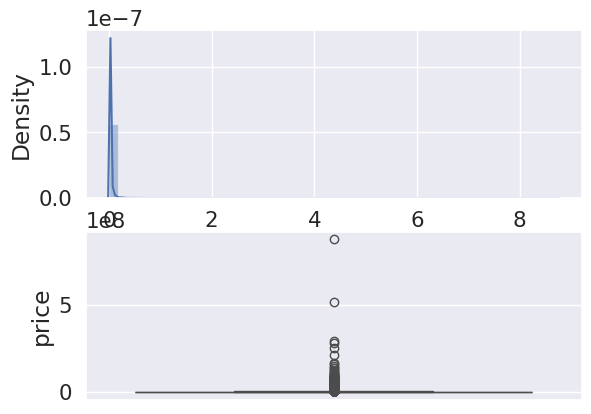

In [62]:
plot(data, 'price')

In [63]:
# Handling outliers
data['price'] = np.where(data['price'] >= 5, data['price'].median(),data['price'])

/tmp/ipykernel_13258/3995815586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax1)


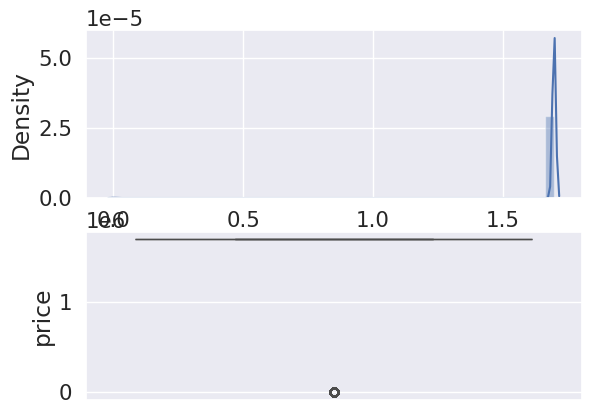

In [64]:
plot(data, 'price')

## Correlation of numerical_features

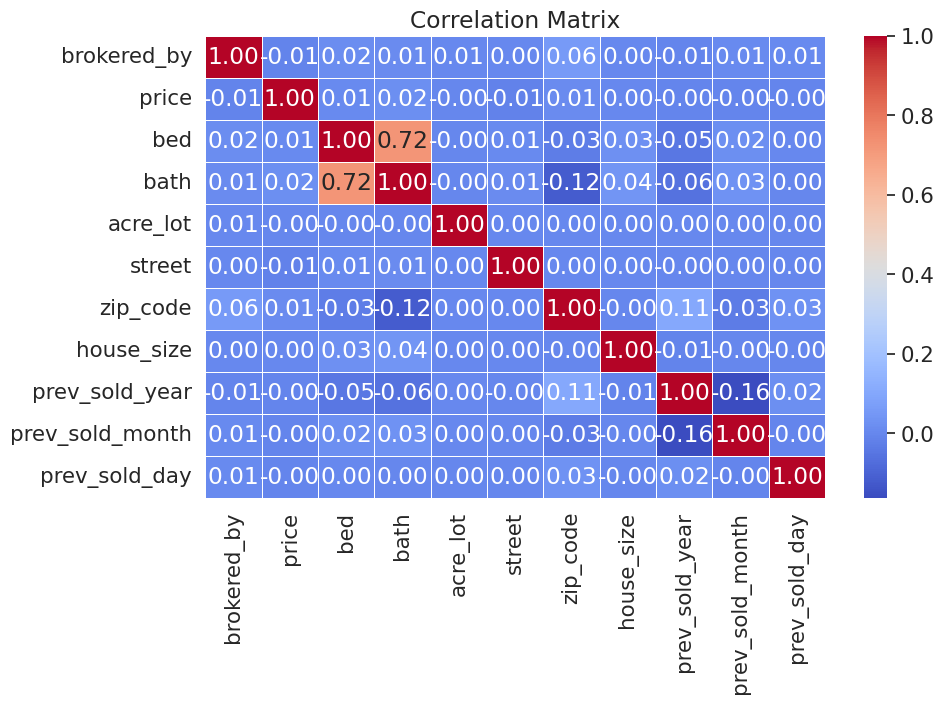

                 brokered_by     price       bed      bath  acre_lot  \
brokered_by         1.000000 -0.010491  0.018919  0.012781  0.005136   
price              -0.010491  1.000000  0.009038  0.020528 -0.001177   
bed                 0.018919  0.009038  1.000000  0.719356 -0.002533   
bath                0.012781  0.020528  0.719356  1.000000 -0.001716   
acre_lot            0.005136 -0.001177 -0.002533 -0.001716  1.000000   
street              0.001221 -0.013782  0.006146  0.011883  0.001985   
zip_code            0.058001  0.012881 -0.028657 -0.120461  0.003209   
house_size          0.002622  0.001308  0.028314  0.038197  0.001537   
prev_sold_year     -0.006439 -0.004228 -0.048515 -0.058025  0.002170   
prev_sold_month     0.006061 -0.004060  0.023816  0.032253  0.004075   
prev_sold_day       0.009555 -0.004336  0.003253  0.001114  0.000286   

                   street  zip_code  house_size  prev_sold_year  \
brokered_by      0.001221  0.058001    0.002622       -0.006439   
p

In [65]:
# Correlation matrix
correlation_matrix = data[numerical_column].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

## Separate independent variables and Dependent Vararibles


In [66]:
X_data = data.drop('price', axis = 1)

y_data = data['price']

### Apply feature selection

In [67]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X_data, y_data)

In [68]:
imp = pd.DataFrame(mic, index = X_data.columns)
imp


,0
sold,0.015515
brokered_by,0.004742
bed,0.005829
bath,0.005713
acre_lot,0.001101
street,0.000338
zip_code,0.005935
house_size,0.000890
prev_sold_year,0.003465
prev_sold_month,0.002369


In [69]:
imp.columns = ['status']

imp.sort_values(by='status', ascending=True)

,status
street,0.000338
house_size,0.000890
prev_sold_day,0.000956
acre_lot,0.001101
prev_sold_month,0.002369
prev_sold_year,0.003465
brokered_by,0.004742
bath,0.005713
bed,0.005829
zip_code,0.005935


## Applying Random Forest on Data and Automate Predictions 

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, 
                                                    train_size = 0.8, random_state = 42)

In [72]:
from sklearn import metrics
import pickle
import os

# Function to predict x_test
def predictions(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print(f'Training score: {model.score(X_train, y_train)}')
    prediction = model.predict(X_test)
    print(f'Predictions are: {prediction}')

    print('\n')

    # model evaluation using r2_score
    r2_score = metrics.r2_score(y_test, prediction)
    print(f'R2 score is {r2_score}')

    # model evaluation using mean absolute error
    mae = metrics.mean_absolute_error(y_test, prediction)
    print(f'Mean absolute error is {mae}')

    # model evaluation using mean squared error
    mse = metrics.mean_squared_error(y_test, prediction)
    print(f'Mean Squared error is {mse}')

    # model evaluation using root mean squared error
    rmse = np.sqrt(mae)
    print(f'RMSE is {rmse}')
    sns.distplot(y_test-prediction)


    if dump == 1:
        file = open('model.pkl', 'wb')
        pickle.dump(model, file)


        


In [73]:
from sklearn.ensemble import RandomForestRegressor



Training score: 0.905862752813945
Predictions are: [1698000. 1698000. 1698000. ... 1698000. 1698000. 1698000.]


R2 score is 0.2691136740237662
Mean absolute error is 4504.412992040363
Mean Squared error is 3751245680.3755193
RMSE is 67.11492376543657


/tmp/ipykernel_13258/17517126.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


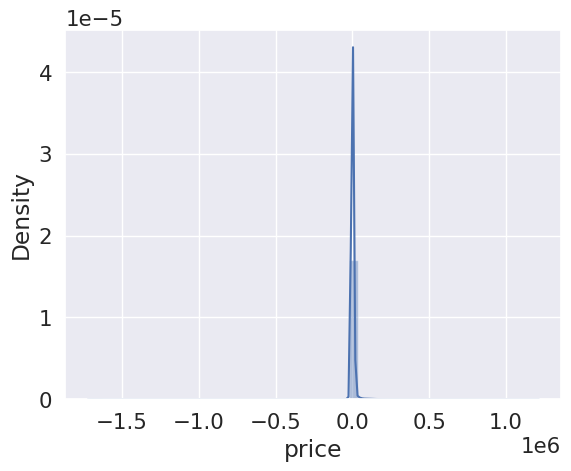

In [74]:
predictions(RandomForestRegressor(), 1)

## Let's use different algorithms

Training score: 0.0011017768881930179
Predictions are: [1696912.01787251 1695600.82656184 1695474.52498578 ... 1693656.40111309
 1695472.42341405 1694784.72811482]


R2 score is 0.0013695990194406704
Mean absolute error is 5854.161289857227
Mean Squared error is 5125431746.128752
RMSE is 76.51249107078678


/tmp/ipykernel_4579/408550089.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


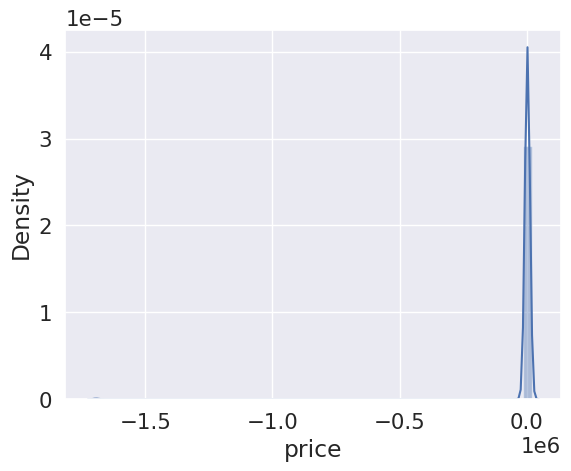

In [67]:
from sklearn.linear_model import LinearRegression

predictions(LinearRegression(), 0)

Training score: 0.9984884896858451
Predictions are: [1698000. 1698000. 1698000. ... 1698000. 1698000. 1698000.]


R2 score is -0.02622030996385627
Mean absolute error is 3101.9075725283806
Mean Squared error is 5267035882.390718
RMSE is 55.69477150081846


/tmp/ipykernel_4579/408550089.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


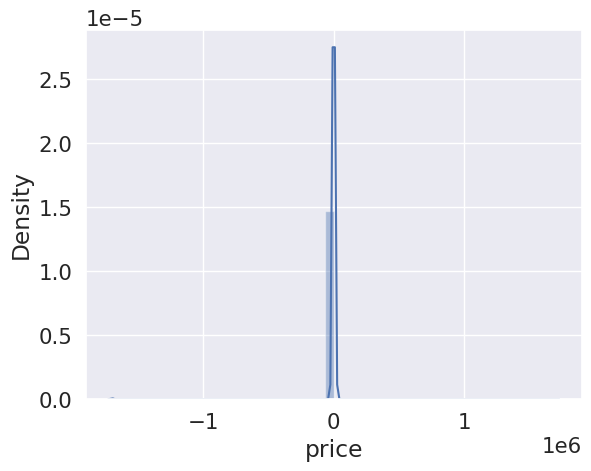

In [68]:
from sklearn.neighbors import KNeighborsClassifier

predictions(KNeighborsClassifier(), 0)

Training score: 1.0
Predictions are: [1698000. 1698000. 1698000. ... 1698000. 1698000. 1698000.]


R2 score is -0.41716147772858125
Mean absolute error is 4283.586881823322
Mean Squared error is 7273526241.74938
RMSE is 65.44911673829772


/tmp/ipykernel_4579/408550089.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


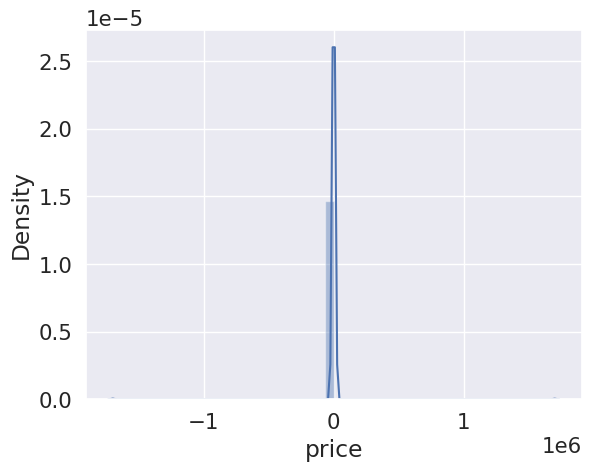

In [69]:
from sklearn.tree import DecisionTreeRegressor

predictions(DecisionTreeRegressor(), 0)

### from the above algorithm we can say DecisionTreeRegressor gives the 100 accuracy.

## Cross Validate our Model

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
n_estimator = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]

Linespace just give us how much number we want between two number.

In above code code we olny get 6 number from number between 100 and 1200 for n_estimator. I did int because i want my number to be integer

In [81]:
# a = np.linspace(start=1, stop=5, num=8)
# a

In [93]:
random_grid = {
    'n_estimators':n_estimator,
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_leaf':[1,2,4],
    'min_samples_split': [2,5,10]
}

In [94]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [101]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, cv = 3, verbose = 2, random_state=42, n_jobs=-1)

In [102]:
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   0.0s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

/home/ubuntu/minor_project/usa_real_estate_price_prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/minor_project/usa_real_estate_price_prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/minor_project/usa_real_estate_price_prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/minor_project

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [103]:
rfr_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [104]:
predictions = rfr_random.predict(X_test)

In [105]:
predictions

array([1698000.   , 1696302.001, 1698000.   , ..., 1698000.   ,
       1698000.   , 1698000.   ])

/tmp/ipykernel_4579/2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='price', ylabel='Density'>

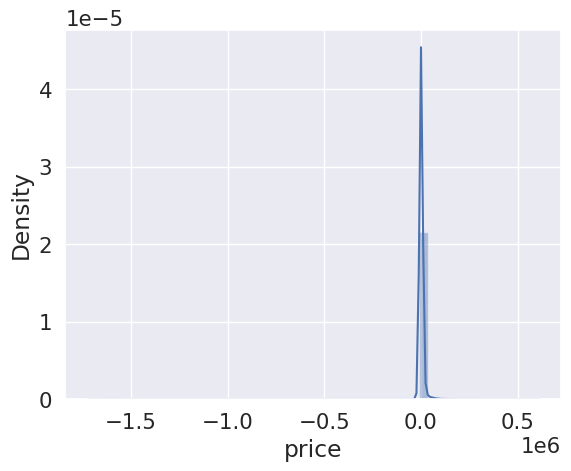

In [106]:
sns.distplot(y_test-predictions)

In [112]:
metrics.r2_score(y_test, predictions)

0.25809846779135737

In [116]:
file = open('/home/ubuntu/minor_project/usa_real_estate_price_prediction.model.pkl', 'wb')


In [117]:
pickle.dump(rfr_random, file)

## Loading the dumb pickle

In [118]:
dumped_model = open('/home/ubuntu/minor_project/usa_real_estate_price_prediction.model.pkl', 'rb')
rfr_random_dumped = pickle.load(dumped_model)

### prediction using user input

In [131]:
# minimum and maximum value for each features
def min_max(data, feature):
    min = np.min(data[feature])
    max = np.max(data[feature])

    print(f'Minimum value of {feature} is: {min}')
    print(f'Maximum value of {feature} is: {max}')



Minimum value of acre_lot is: 0.0
Maximum value of acre_lot is: 94457.0


In [133]:
min_max(X_data, 'sold')
min_max(X_data, 'brokered_by')
min_max(X_data, 'bed')
min_max(X_data, 'bath')
min_max(X_data, 'acre_lot')
min_max(X_data, 'street')
min_max(X_data, 'zip_code')
min_max(X_data, 'house_size')
min_max(X_data, 'prev_sold_day')
min_max(X_data, 'prev_sold_year')
min_max(X_data, 'prev_sold_month')


Minimum value of sold is: 0
Maximum value of sold is: 1
Minimum value of brokered_by is: 8
Maximum value of brokered_by is: 110138
Minimum value of bed is: 1
Maximum value of bed is: 212
Minimum value of bath is: 1
Maximum value of bath is: 212
Minimum value of acre_lot is: 0.0
Maximum value of acre_lot is: 94457.0
Minimum value of street is: 187
Maximum value of street is: 2001161
Minimum value of zip_code is: 646
Maximum value of zip_code is: 99901
Minimum value of house_size is: 4
Maximum value of house_size is: 12992200
Minimum value of prev_sold_day is: 1928
Maximum value of prev_sold_day is: 2023
Minimum value of prev_sold_year is: 1
Maximum value of prev_sold_year is: 31
Minimum value of prev_sold_month is: 1
Maximum value of prev_sold_month is: 12


In [139]:
# Taking inputs from the user to precict the house of the price 

print('Enter the details of the house your want to buy and predict the price:')
bed = int(input('Enter Number of beds between 1 and 212: '))
bath = int(input('Enter Number of bath between 1 and 212: '))
street = int(input('Enter the street between 187 and 2001161: '))
house_size = int(input('Enter the house size in sq. meter between 4 and 12992200: '))
zip_code = int(input('Enter zip code between 646 and 99901: '))
status = int(input('Status of the house 0 for sold and 1 for not sold'))
prev_sold_day = int(input('Enter prev_sold_day between 1 and 31: '))
prev_sold_month = int(input('Enter prev_sold_month between 1 and 12: '))
prev_sold_year = int(input('Enter prev_sold_year between 1928 and 2023: '))
acre_lot = int(input('Enter the acre_lot between 0 and 94457: '))
brokered_by = int(input('Enter the brikered_by between 8 and 110138: '))



Enter the details of the house your want to buy and predict the price:


In [138]:
features = np.array([[bed, bath, street, house_size, zip_code, status, prev_sold_year, prev_sold_day, prev_sold_month, acre_lot, brokered_by]])
random_forest_prediction = rfr_random_dumped.predict(features)

print(f'Predicted usa real estate price is {random_forest_prediction}')

Predicted usa real estate price is [1528056.57865595]


/home/ubuntu/minor_project/usa_real_estate_price_prediction/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [122]:
metrics.r2_score(y_test, random_forest_prediction)

0.25809846779135737